<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-and-Submitting-Data" data-toc-modified-id="Downloading-and-Submitting-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading and Submitting Data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Understanding-the-data" data-toc-modified-id="Understanding-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data</a></span></li><li><span><a href="#Data-preparation-and-machine-learning" data-toc-modified-id="Data-preparation-and-machine-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation and machine learning</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

Here's a simple getting started notebook that shows you how to load the data, and how to create a Kaggle submission file. Remember that you should structure your notebook after the 8 step guide, as detailed in the [Assignment 1 instructions](https://hvl.instructure.com/courses/9086/assignments/17277). 

# Downloading and Submitting Data

## Setup

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

## Data

Go to Kaggle competition website and download the data. Make a new folder in your DAT158ML repository called 'data'. Store the Kaggle competition data in this folder

Then you should uncomment the code and run the following two cells. **Warning:** This doesn't work in this Kaggle hosted notebook! See below

In [2]:
# lists the files in the folder
# import os
# print(os.listdir("data"))

In [3]:
# Reads in the csv-files and creates a dataframe using pandas

base_set = pd.read_csv('data/housing_data.csv')
benchmark = pd.read_csv('data/housing_test_data.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

**Kaggle-specific way of accessing the data**

On Kaggle the data is stored in the folder `../input/dat158-2019/`:

In [4]:
#base_set = pd.read_csv('../input/dat158-2019/housing_data.csv')
#benchmark = pd.read_csv('../input/dat158-2019/housing_test_data.csv')
#sampleSubmission = pd.read_csv('../input/dat158-2019/sample_submission.csv')

# Understanding the data

In [5]:
base_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
benchmark.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [7]:
base_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [8]:
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
Id                    4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4089 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [9]:
base_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


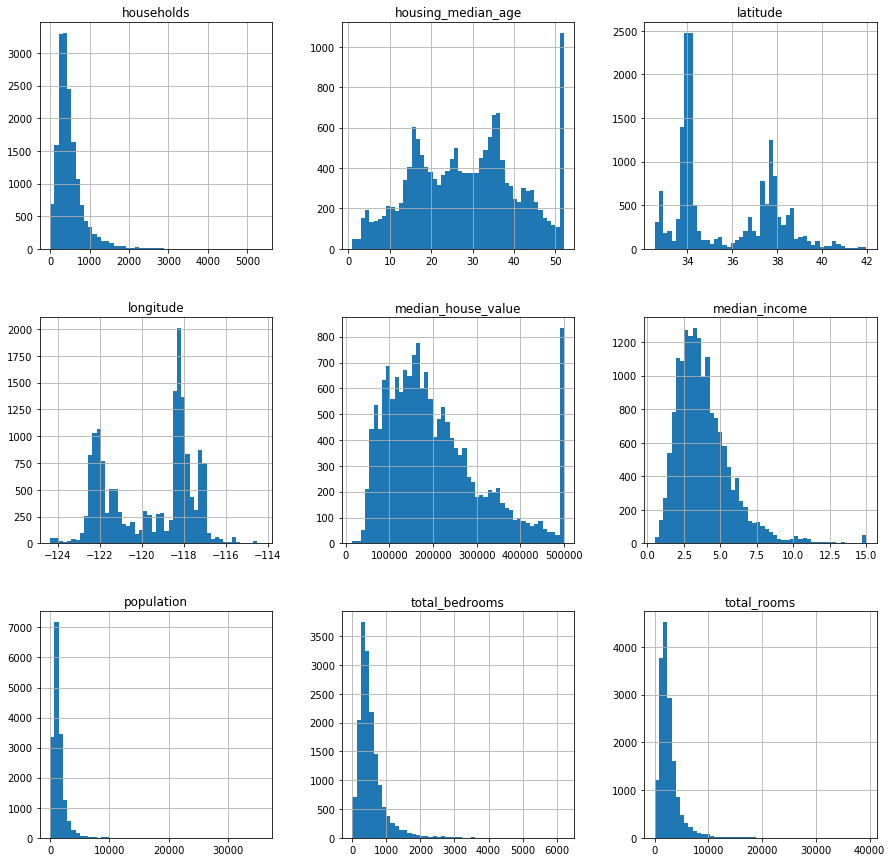

In [10]:
base_set.hist(bins=50, figsize=(15,15))
plt.show()

Scatter plot showing the distribution of housing value across California, from low (blue) to high (red).

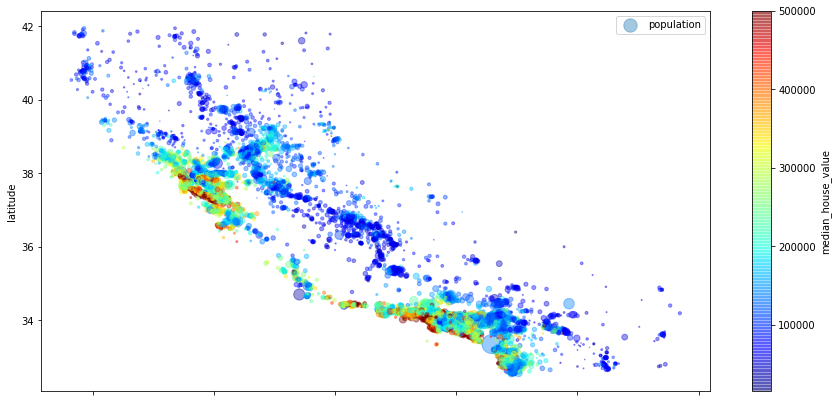

In [11]:
base_set.plot(kind="scatter", 
           x="longitude", 
           y="latitude", 
           alpha=0.4,
           s=base_set["population"]/100, 
           label="population",
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
           figsize=(15,7))
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f20950>,
      dtype=object)

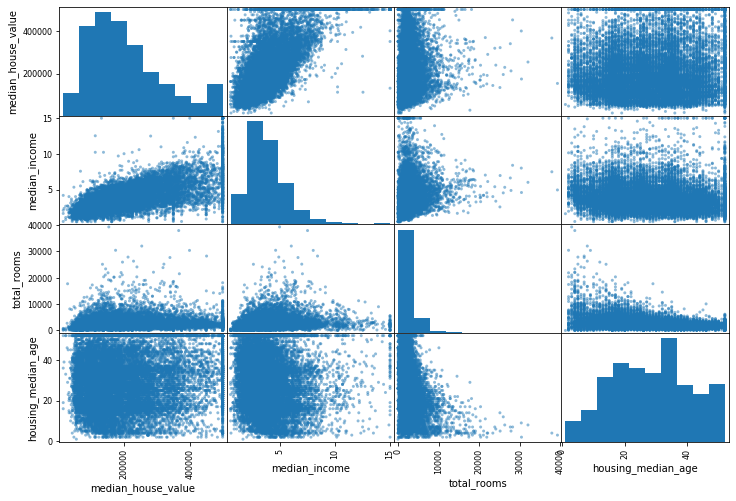

In [12]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(base_set[attributes], figsize=(12,8))

# Data preparation and machine learning

This part you should code and figure out yourself. Play around with different ways to prepare the data, different machine learning models and settings of hyperparameters

Remember to create your own validation set to evaluate your models. Your test set will not contain labels and are therefore not suited for evaluating and tuning your different models. 


## Clean up the data and separate labels and values

There are `null` values in both the main dataset and the benchmark set, which we have to clean up. This time we fill those with the median of all the other values in the column.

In [13]:
# There are null values in total_bedrooms, we fill those with the median
def fill_null(dataset, column):
    column_median = dataset[column].median()
    
    return dataset.fillna(column_median)

# test.isnull().any()

# For these particular sets, there are only null values in the 'total_bedrooms' column.
base_set = fill_null(base_set, 'total_bedrooms')
benchmark = fill_null(benchmark, 'total_bedrooms')

Then we separate the values and the labels. We are now ready to start shaping our dataset.

In [14]:
X = base_set.drop(columns=['median_house_value'])
Y = base_set['median_house_value']

## Transforming dataset

Here we derive useful datapoints from existing ones. We also use one-hot encoding to transform string columns into separate columns containing numbers.

In [15]:
def derive_datapoints(dataset):
    dataset['bedrooms_per_room'] = dataset['total_bedrooms'] / dataset['total_rooms']

    dataset['rooms_per_household'] = dataset['total_rooms'] / dataset['households']
    dataset['bedrooms_per_household'] = dataset['total_bedrooms'] / dataset['households']
    dataset['population_per_household'] = dataset['population'] / dataset['households']
    
    return dataset

X = derive_datapoints(X)
benchmark = derive_datapoints(benchmark)

# One-hot encoding
X = pd.get_dummies(X)
benchmark = pd.get_dummies(benchmark)

For this particular dataset, we also need to do a couple extra things to the benchmark set.

In [16]:
# We remove the ID column from the submission set
benchmark = benchmark.drop(columns=['Id'])

# Some housekeeping, we need to ensure the test set has the same columns as the training set
# The missing columns will be the onehot-encoded values
missing_columns = set( X.columns ) - set( benchmark.columns )

for column in missing_columns:
    benchmark[column] = 0

# Ensure the order of column in the test set is in the same order than in train set
benchmark = benchmark[X.columns]

In [17]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0.181922,5.514196,1.003155,2.883281,0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0.149289,6.698413,1.000000,2.507937,0,1,0,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,0.180973,5.137640,0.929775,2.502809,1,0,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,0.147423,6.665217,0.982609,3.013043,1,0,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0.251799,4.393678,1.106322,3.870690,0,0,0,1,0


In [18]:
benchmark.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,0.344313,3.218000,1.108000,1.675000,0,0,0,1,0
1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,0.158580,6.349398,1.006885,3.266781,1,0,0,0,0
2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,0.203364,5.005102,1.017857,2.563776,0,1,0,0,0
3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,0.318182,3.248705,1.033679,3.318653,1,0,0,0,0
4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,0.274241,4.271967,1.171548,5.263598,0,1,0,0,0


## Split dataset

We split our base set into separate datasets for training, testing and validation.

In [19]:
from sklearn.model_selection import train_test_split

# First split our main set
X_train, X_validation_and_test, Y_train, Y_validation_and_test = train_test_split(X, Y, test_size=0.3)

# Then split our second set into validation and test
X_validation, X_test, Y_validation, Y_test = train_test_split(X_validation_and_test, Y_validation_and_test, test_size=0.5)

## Normalization

To make the scales of the numbers appropriate for the neural network, we have to do some scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_scaler = MinMaxScaler().fit(X_train)
def scale_dataset_X(dataset):
    return X_scaler.transform(dataset)

Y_scaler = MinMaxScaler().fit(pd.DataFrame(Y_train))
def scale_dataset_Y(dataset):
    return Y_scaler.transform([dataset])

X_train_scaled = scale_dataset_X(X_train)
Y_train_scaled = scale_dataset_Y(Y_train)

X_validation_scaled = scale_dataset_X(X_validation)
Y_validation_scaled = scale_dataset_Y(Y_validation)

X_test_scaled = scale_dataset_X(X_test)
Y_test_scaled = scale_dataset_Y(Y_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Set up and train model

Now, it is time to set up the architecture.

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(50, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(48, activation='relu'),
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1),
])

model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                900       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 48)                1584      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

Let's compile and fit the model on the data.

In [22]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

training_result = model.fit(X_train_scaled, Y_train,
                 batch_size=32,
                 epochs=250,
                 validation_data=(X_validation_scaled, Y_validation))


Train on 11558 samples, validate on 2477 samples
Epoch 1/250
11558/11558 [==============================] - 2s 168us/step - loss: 23188821704.1398 - mae: 114374.6484 - val_loss: 8395096014.8050 - val_mae: 72638.2656
Epoch 2/250
11558/11558 [==============================] - 1s 80us/step - loss: 6857169910.6531 - mae: 62932.9688 - val_loss: 6097698537.3662 - val_mae: 56761.3594
Epoch 3/250
11558/11558 [==============================] - 1s 80us/step - loss: 5434522123.7834 - mae: 54085.5820 - val_loss: 5471316583.4542 - val_mae: 52716.0547
Epoch 4/250
11558/11558 [==============================] - 1s 73us/step - loss: 5093949292.1544 - mae: 51766.7930 - val_loss: 5375442407.9193 - val_mae: 50802.6367
Epoch 5/250
11558/11558 [==============================] - 1s 70us/step - loss: 4943135001.2943 - mae: 50590.6641 - val_loss: 5158474079.0828 - val_mae: 51479.6094
Epoch 6/250
11558/11558 [==============================] - 1s 66us/step - loss: 4817738636.6915 - mae: 49941.0234 - val_loss: 5

11558/11558 [==============================] - 2s 203us/step - loss: 3498067594.7866 - mae: 41004.9492 - val_loss: 3816986273.6407 - val_mae: 42791.9258
Epoch 50/250
11558/11558 [==============================] - 1s 72us/step - loss: 3518627116.5198 - mae: 41241.3008 - val_loss: 3720729451.6916 - val_mae: 41964.0000
Epoch 51/250
11558/11558 [==============================] - 1s 75us/step - loss: 3472497434.7673 - mae: 40781.8789 - val_loss: 3681712266.6968 - val_mae: 41456.578107867520.9467 - mae: 40558.
Epoch 52/250
11558/11558 [==============================] - 1s 77us/step - loss: 3465341317.5594 - mae: 40769.3203 - val_loss: 3686352638.5531 - val_mae: 41527.9453
Epoch 53/250
11558/11558 [==============================] - 1s 86us/step - loss: 3464948986.5513 - mae: 40662.3281 - val_loss: 3652332066.5192 - val_mae: 41375.1641
Epoch 54/250
11558/11558 [==============================] - 1s 85us/step - loss: 3458274316.3149 - mae: 40678.2070 - val_loss: 3606669824.1034 - val_mae: 41930.

11558/11558 [==============================] - 1s 59us/step - loss: 3019448460.2042 - mae: 37741.5352 - val_loss: 3259161987.7723 - val_mae: 37765.3711
Epoch 99/250
11558/11558 [==============================] - 1s 64us/step - loss: 2987087148.4977 - mae: 37607.2188 - val_loss: 3269525907.9984 - val_mae: 39483.7109
Epoch 100/250
11558/11558 [==============================] - 1s 80us/step - loss: 3009751828.3329 - mae: 37770.6602 - val_loss: 3256330763.7820 - val_mae: 37949.2695
Epoch 101/250
11558/11558 [==============================] - 1s 66us/step - loss: 3027265965.8488 - mae: 37894.2344 - val_loss: 3296473435.5688 - val_mae: 38575.0781
Epoch 102/250
11558/11558 [==============================] - 1s 86us/step - loss: 2989813023.9391 - mae: 37584.2188 - val_loss: 3378267191.1893 - val_mae: 38359.2383
Epoch 103/250
11558/11558 [==============================] - 1s 98us/step - loss: 2994631174.1464 - mae: 37582.0586 - val_loss: 3398365064.5264 - val_mae: 38592.8555
Epoch 104/250
11558

11558/11558 [==============================] - 1s 65us/step - loss: 2846025220.0311 - mae: 36591.4141 - val_loss: 3164633228.0404 - val_mae: 38130.4336
Epoch 148/250
11558/11558 [==============================] - 1s 63us/step - loss: 2842153550.8067 - mae: 36528.1758 - val_loss: 3132201493.8070 - val_mae: 36751.7031
Epoch 149/250
11558/11558 [==============================] - 1s 68us/step - loss: 2841675700.1613 - mae: 36570.7109 - val_loss: 3119424031.6254 - val_mae: 36796.0273
Epoch 150/250
11558/11558 [==============================] - 1s 77us/step - loss: 2808996488.7932 - mae: 36314.4258 - val_loss: 3128141650.7840 - val_mae: 37168.1016
Epoch 151/250
11558/11558 [==============================] - 1s 68us/step - loss: 2832843851.7058 - mae: 36514.5234 - val_loss: 3438826379.5236 - val_mae: 38105.2578
Epoch 152/250
11558/11558 [==============================] - 1s 65us/step - loss: 2822665346.5250 - mae: 36443.9258 - val_loss: 3149347158.0912 - val_mae: 37555.3789
Epoch 153/250
1155

11558/11558 [==============================] - 2s 210us/step - loss: 2802608610.7354 - mae: 36427.0898 - val_loss: 3013221222.4207 - val_mae: 36740.6445
Epoch 197/250
11558/11558 [==============================] - 2s 201us/step - loss: 2724474825.9117 - mae: 35779.9023 - val_loss: 3130174644.9673 - val_mae: 37613.9922
Epoch 198/250
11558/11558 [==============================] - 3s 264us/step - loss: 2711203337.3469 - mae: 35706.3750 - val_loss: 3000716353.0077 - val_mae: 36159.6914
Epoch 199/250
  416/11558 [>.............................] - ETA: 30s - loss: 2545293016.6154 - mae: 36683.4219

/usr/local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.137800). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


11558/11558 [==============================] - 3s 279us/step - loss: 2761993332.8590 - mae: 36063.6328 - val_loss: 3097759637.9621 - val_mae: 37158.8711
Epoch 200/250
11558/11558 [==============================] - 1s 82us/step - loss: 2713601579.4345 - mae: 35825.9922 - val_loss: 3056138102.0266 - val_mae: 37128.3398
Epoch 201/250
11558/11558 [==============================] - 1s 89us/step - loss: 2720494743.9875 - mae: 35711.1055 - val_loss: 3124411851.1877 - val_mae: 38462.9180
Epoch 202/250
11558/11558 [==============================] - 2s 144us/step - loss: 2741346727.0933 - mae: 35854.4844 - val_loss: 3508059116.1566 - val_mae: 42352.5938
Epoch 203/250
11558/11558 [==============================] - 2s 170us/step - loss: 2734809626.5624 - mae: 35775.6328 - val_loss: 3110429257.2757 - val_mae: 38310.5156
Epoch 204/250
11558/11558 [==============================] - 3s 239us/step - loss: 2702867093.3407 - mae: 35607.2031 - val_loss: 3329115957.6391 - val_mae: 38454.8164
Epoch 205/250


11558/11558 [==============================] - 1s 67us/step - loss: 2626843759.6096 - mae: 35036.0195 - val_loss: 3009222498.2866 - val_mae: 37182.8164
Epoch 249/250
11558/11558 [==============================] - 1s 66us/step - loss: 2630016953.3885 - mae: 35155.9805 - val_loss: 3027853048.5587 - val_mae: 37544.6719
Epoch 250/250
11558/11558 [==============================] - 1s 61us/step - loss: 2620583216.1191 - mae: 35054.2344 - val_loss: 2960443044.9479 - val_mae: 36290.3398


Now, let's look into how the fitting went.

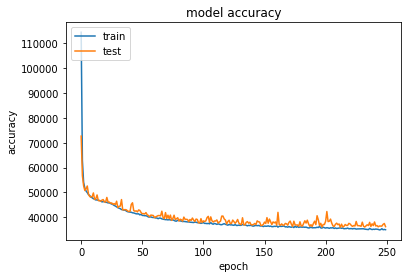

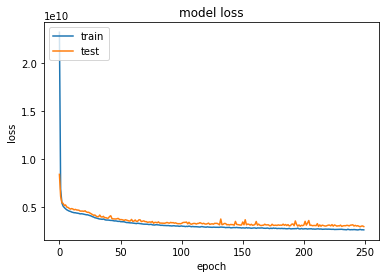

In [25]:
# Plot model accuracy over epoch
plt.plot(training_result.history['mae'])
plt.plot(training_result.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot model loss over epoch
plt.plot(training_result.history['loss'])
plt.plot(training_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test model

In [26]:
validate_result = model.test_on_batch(X_validation_scaled, Y_validation)
validate_result

[2960442600.0, 36290.34]

In [27]:
test_result = model.test_on_batch(X_test_scaled, Y_test)
test_result

[3247867600.0, 38017.133]

## Use model on test set

Finally, we churn the test set through the model we created.

In [28]:
# Scale test data
benchmark_scaled = scale_dataset_X(benchmark)

#test.isnull().any()
benchmark.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,0.344313,3.218000,1.108000,1.675000,0,0,0,1,0
1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,0.158580,6.349398,1.006885,3.266781,1,0,0,0,0
2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,0.203364,5.005102,1.017857,2.563776,0,1,0,0,0
3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,0.318182,3.248705,1.033679,3.318653,1,0,0,0,0
4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,0.274241,4.271967,1.171548,5.263598,0,1,0,0,0


In [29]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0.181922,5.514196,1.003155,2.883281,0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0.149289,6.698413,1.000000,2.507937,0,1,0,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,0.180973,5.137640,0.929775,2.502809,1,0,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,0.147423,6.665217,0.982609,3.013043,1,0,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0.251799,4.393678,1.106322,3.870690,0,0,0,1,0


In [30]:
median_house_value = model.predict(benchmark_scaled)

# Submission

After you have trained your model and have found predictions on your test data, you must create a csv-file that contains 'Id' and your predictions in two coloums

We have assumed that you have called your predicitons 'median_house_value' after you have trained your model

This is just for demonstrational purposes, that is why all our predictions is zero. Yours will be filled with numbers


In [31]:
len(median_house_value)

4128

In [32]:
median_house_value

array([[240097.88],
       [291126.7 ],
       [ 77766.82],
       ...,
       [ 96139.54],
       [351104.6 ],
       [144501.8 ]], dtype=float32)

In [33]:
submission = pd.DataFrame({
    'Id': [i for i in range(len(median_house_value))],
    'median_house_value': median_house_value.flatten()
})

In [34]:
submission.head()

,Id,median_house_value
0,0,240097.875000
1,1,291126.687500
2,2,77766.820312
3,3,182152.296875
4,4,58766.843750


In [35]:
# Stores a csv file to submit to the kaggle competition
submission.to_csv('submission.csv', index=False)